## Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. 
 - Would you accept that coupon and take a short detour to the restaraunt? 
 - Would you accept the coupon but use it on a sunbsequent trip? 
 - Would you ignore the coupon entirely? 
 - What if the coupon was for a bar instead of a restaraunt? 
 - What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? 
 - What about if it was just you and your partner in the car? 
 - Would weather impact the rate of acceptance? 
 - What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





## Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
#import the different libraries neeeded for EDA and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

### Problems

Use the prompts below to get started with your data analysis.  

#### 1. Read in the `coupons.csv` file.




In [2]:
#read the csv file into a dataframe
data = pd.read_csv('data/coupons.csv')

In [3]:
#list the top 5 rows fo the dataframe with the data
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
#get the metadata details of the difference columns within the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
#loop through each of the columns and change the dtype of the columsn which is int64
for column in data.columns:
    if data[column].dtype == 'int64':
        data[column] = data[column].astype('object')

In [6]:
#confirm that the data type has now changed to "object"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  object
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  object
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### 2. Investigate the dataset for missing or problematic data.

In [7]:
#review the unique values present within the dataframe to decide if any cleanup and modification is required
for column in data.columns:
    unique_values = data[column].unique()
    print(column,unique_values)

destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
temperature [55 80 30]
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children [1 0]
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 

In [8]:
#find if any null values exists within the dataframe for any column and if yes then what % out of totol rows the 
#the null value exists
(data.isnull().sum()/(data.shape[0]))*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

#### 3. Decide what to do about your missing data -- drop, replace, other...

**3a.** First, we will drop the column "car" from the dataset as it contain 99%  of NaN values and cannot be used for any effective conclusion.

In [9]:
#we are dropping the column 'car' from the data as it contains 99% null values and cannot be used
data.drop(columns=['car'],inplace=True)

In [10]:
data.shape

(12684, 25)

    3b. Now we will replace the NaN values in columns "Bar","CoffeHouse", "CarryAway", "RestaurantLessThan20" and "Restaurant20To50" with the value "never"

In [11]:
#reviwing the null values in other columns, we will use 'never' to fill the null values
data.fillna('never', inplace=True)

In [12]:
#confirm we do not have any null values left in any columns
(data.isnull().sum()/(data.shape[0]))*100

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
time                    0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ5min        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Y                       0.0
dtype: float64

    3c. Checking for duplicate records

In [13]:
# check if your dataframe contains any duplicated values
data.duplicated().sum()

74

In [14]:
#we will remove the duplicate values
data.drop_duplicates(inplace=True)
# check again if the duplicate values have been removed
data.duplicated().sum()

0

4. What proportion of the total observations chose to accept the coupon? 



Proportion of observations that accepted the coupon: 56.8%


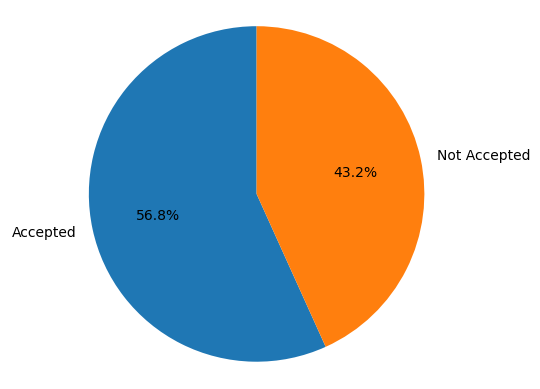

In [15]:
#calculate and print total count and % values which were accepted
proportion_accepted = data['Y'].value_counts()[1]/data['Y'].count()
print(f"Proportion of observations that accepted the coupon: {proportion_accepted:.1%}")

# Using the 'Y' column containing binary values (1 for accepted, 0 for not accepted)
labels = ['Accepted', 'Not Accepted']
counts = data['Y'].value_counts() #calculate the row count containing

#create the pie chart 
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

5. Use a bar plot to visualize the `coupon` column.

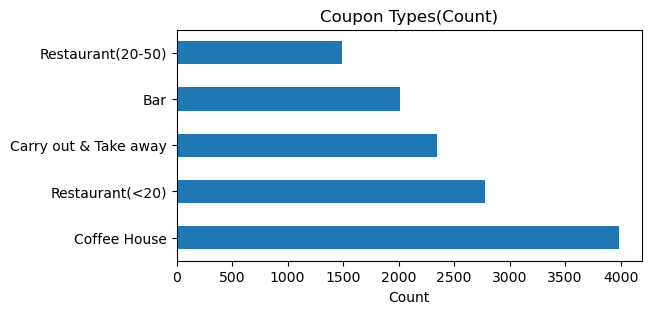

In [16]:
# Calculate the record counts for each of the different coupon types
coupon_counts = data['coupon'].value_counts()

# define the figsize of the grap to be created
plt.figure(figsize=(6, 3))

#create the bar graph
coupon_counts.plot(kind='barh')

#update the graph labels and title
plt.xlabel('Count')
plt.title('Coupon Types(Count)')
plt.show()

6. Use a histogram to visualize the temperature column.

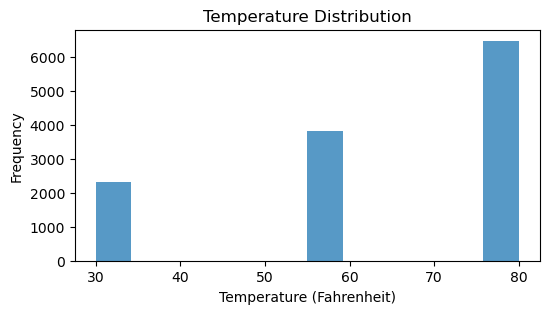

In [17]:
# define the figsize of the grap to be created
plt.figure(figsize=(6, 3))

# create the histogram for the temperature column
sns.histplot(data=data, x='temperature', bins=12, linewidth=0, color = '#1F77B4')

#update the graph title, x label and y label etc.
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
# create a new dataframe by selected only "Bar" coupon data from "Coupon" column
data_bar = data[data["coupon"] == "Bar"].reset_index()

2. What proportion of bar coupons were accepted?


Proportion of Bar coupons that were accepted: 41.0%


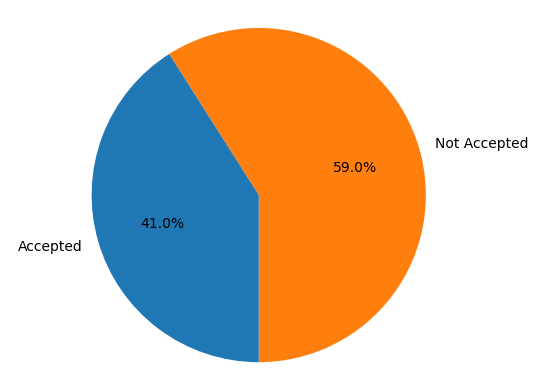

In [19]:
# calculate and print the proportionn of the records which were acccpted from the total record counts
proportion_accepted = data_bar['Y'].value_counts()[1]/data_bar['Y'].count()
print(f"Proportion of Bar coupons that were accepted: {proportion_accepted:.1%}")

# create the list for lable and color to be used in graph
labels = ['Not Accepted', 'Accepted']
colors = ['#FF7F0E','#1F77B4']

# Using the 'Y' column containing binary values (1 for accepted, 0 for not accepted)
counts = data_bar['Y'].value_counts()

# create pie chart for the record count
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors = colors, startangle=270)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate for drivers freq > 3: 37%
Acceptance rate for drivers freq < 3: 77%


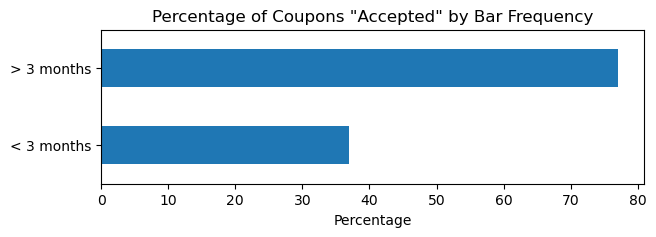

In [20]:
# create a new dataframe by selected only "Bar" coupon data from "Coupon" column
data_bar = data[data["coupon"] == "Bar"].reset_index()

# for the given condition we will try to harmonize the data in "Bar" column by replacing all the different unique values
# with the values belonging to either the group "< 3 months" or "> 3 months"


#create a dictionary to be used to replace the existing values with values of either of the two groups
values_to_replace = {
    'never': '< 3 months',
    'less1': '< 3 months',
    '1~3': '< 3 months',
    'gt8': '> 3 months',
    '4~8': '> 3 months'}

# using .replace and the dictionary object create before we will replace the existing values with new values
data_bar["Bar"] = data_bar["Bar"].replace(values_to_replace)

# we will create a crosstab table containing the two categors from "Bar" column and the Acceptance vsl Rejection values
# from the "Y" column
bar_crosstab = pd.crosstab(data_bar["Bar"],data_bar["Y"])

# now we calculate and print the acceptance percentages for the two groups 
bar_perct = (bar_crosstab.div(bar_crosstab.sum(axis=1), axis=0) * 100).round(0).astype(int)
print(f"Acceptance rate for drivers freq > 3: {(bar_perct.iloc[0 , 1]/100):.0%}")
print(f"Acceptance rate for drivers freq < 3: {(bar_perct.iloc[1 , 1]/100):.0%}")


# define the plot size for the graph
ax = plt.subplots(figsize=(7, 2))

#create the bar graph for the % acepted for the two groups
ax = bar_perct.iloc[:, 1].plot(kind='barh', legend=False)

#update the title, label etc.
ax.set_title('Percentage of Coupons "Accepted" by Bar Frequency')
ax.set_xlabel('Percentage')
ax.set_ylabel('')
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for drivers age > 25 and freq > 1: 69.52%
Acceptance rate for other drivers: 33.46%
Difference : 36.06%


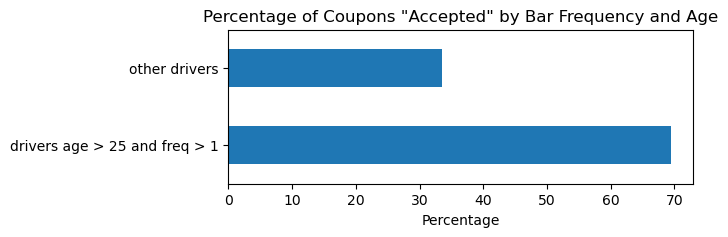

In [21]:
# create a new dataframe by selected only "Bar" coupon data from "Coupon" column
data_bar = data[data["coupon"] == "Bar"].reset_index()

#create two lists with values which meet the condition in the prompt for the different column
list_ages_gt_25 = ['46','26','31','41','50plus','36']
list_freq_gt_1 = ['1~3','gt8','4~8']

# will create boolean mask to fetch the data which meet the conditions noted in the prompt
mask_age = data_bar["age"].isin(list_ages_gt_25)
mask_bar_freq = data_bar["Bar"].isin(list_freq_gt_1)

#create two dataframes which meet and does not meet the requested condition
data_age_bar = data_bar[mask_age & mask_bar_freq]
data_other = data_bar[~(mask_age & mask_bar_freq)]

#calculate acceptance rate for each group using mean()
accept_bar_age = data_age_bar['Y'].mean()
accept_other_drivers = data_other['Y'].mean()

print(f"Acceptance rate for drivers age > 25 and freq > 1: {accept_bar_age:.2%}")
print(f"Acceptance rate for other drivers: {accept_other_drivers:.2%}")

# Check if there's a difference
difference = accept_bar_age - accept_other_drivers
print(f"Difference : {difference:.2%}")

#create data dictionary for bar graph
dict_accpt_rate = {'Acceptance Rate' : [(accept_bar_age*100),(accept_other_drivers*100)] }
data_accept_rate =  pd.DataFrame(dict_accpt_rate,index=["drivers age > 25 and freq > 1", "other drivers"])

#create bar graphs
ax = data_accept_rate.plot(kind='barh',figsize=(6,2), legend=False)

#update the title, label etc.
ax.set_title('Percentage of Coupons "Accepted" by Bar Frequency and Age')
ax.set_xlabel('Percentage')
ax.set_ylabel('')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Acceptance rate for drivers bar freq > 1, no kid passenger and occ not Farming: 71.32%
Acceptance rate for other drivers: 29.54%
Difference : 41.78%


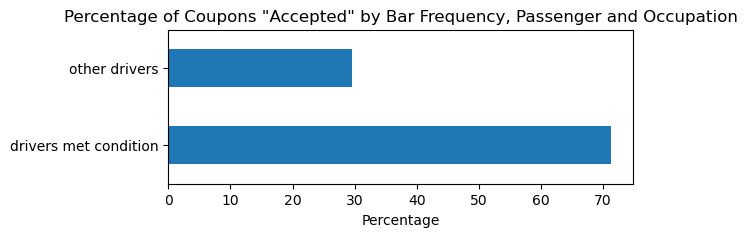

In [22]:
# create a new dataframe by selected only "Bar" coupon data from "Coupon" column
data_bar = data[data["coupon"] == "Bar"].reset_index()

# create the mask to be used to 
list_freq_lt_1 = ['never','less1']
list_with_kids = ['Kid(s)']
list_occ_f = ['Farming Fishing & Forestry']

# will create boolean mask to fetch the data which meet the above condition
mask_bar_freq = data_bar["Bar"].isin(list_freq_lt_1)
mask_passenger = data_bar["passanger"].isin(list_with_kids)
mask_occupation = data_bar["occupation"].isin(list_occ_f)

#create two dataframes which meet and does not meet the requested condition
data_other_drivers = data_bar[mask_bar_freq | mask_passenger | mask_occupation ]
data_bar_pssger_occ = data_bar[~(mask_bar_freq | mask_passenger | mask_occupation)]

#calculate acceptance rate for each group using mean()
accept_bar_pssger_occ = data_bar_pssger_occ['Y'].mean()
accept_other_drivers = data_other_drivers['Y'].mean()

print(f"Acceptance rate for drivers bar freq > 1, no kid passenger and occ not Farming: {accept_bar_pssger_occ:.2%}")
print(f"Acceptance rate for other drivers: {accept_other_drivers:.2%}")

# Check if there's a difference
difference = accept_bar_pssger_occ - accept_other_drivers
print(f"Difference : {difference:.2%}")

#create data dictionary for bar graph
dict_accpt_rate = {'Acceptance Rate' : [(accept_bar_pssger_occ*100),(accept_other_drivers*100)] }
data_accept_rate =  pd.DataFrame(dict_accpt_rate,index=["drivers met condition", "other drivers"])

# create bar graph 
ax = data_accept_rate.plot(kind='barh', figsize=(6,2), legend=False)

#update the title, label etc.
ax.set_title('Percentage of Coupons "Accepted" by Bar Frequency, Passenger and Occupation')
ax.set_xlabel('Percentage')
ax.set_ylabel('')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance rate for drivers go to bars > 1month, with no kid passenger and not widowed: 71.32%
Acceptance rate for drivers go to bars > 1month and lt 30 year age: 72.17%
Acceptance rate for drivers go cheap restaurant gt 4 times and income < 50k: 45.35%


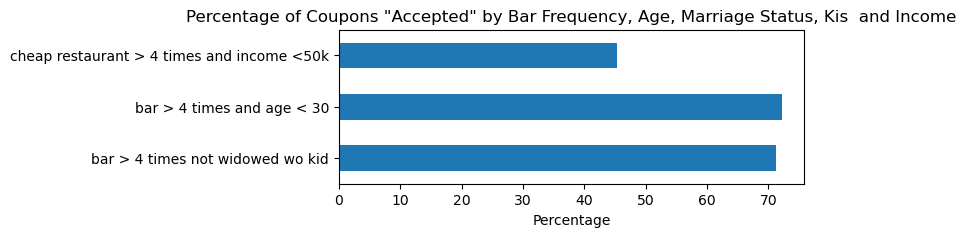

In [23]:
# create a new dataframe by selected only "Bar" coupon data from "Coupon" column
data_bar = data[data["coupon"] == "Bar"].reset_index()

# create the lists to be used to create masks
list_barfreq_gt_1 = ['1~3','gt8','4~8']
list_wo_kids = ['Alone','Friend(s)','Partner']
list_not_widow = ['Unmarried partner','Single','Married partner','Divorced' ]
list_lt_30 = ['21','26','below21']
list_chp_rest_4t = ['4~8','gt8'  ]
list_inc_lt_50k = ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']

#create boolean masks
mask_barfreq_gt_1 = data_bar["Bar"].isin(list_barfreq_gt_1)
mask_wo_kids = data_bar["passanger"].isin(list_wo_kids)
mask_not_widow = data_bar["maritalStatus"].isin(list_not_widow)
mask_lt_30 = data_bar["age"].isin(list_lt_30)
mask_chp_rest_4t = data_bar["RestaurantLessThan20"].isin(list_chp_rest_4t)
mask_inc_lt_50k = data_bar["income"].isin(list_inc_lt_50k)

#create 3 dataframes wich meet the three conditions

# condition 1  : go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
data_condition_1 = data_bar[mask_barfreq_gt_1 & mask_wo_kids & mask_not_widow]

# condition 2 : go to bars more than once a month and are under the age of 30 OR
data_condition_2 = data_bar[mask_barfreq_gt_1 & mask_lt_30]

# condition 3 : go to cheap restaurants more than 4 times a month and income is less than 50K. 
data_condition_3 = data_bar[mask_chp_rest_4t & mask_inc_lt_50k]


# calculate the acceptance rate for above three dataframes

#calculate acceptance rate for each group using mean()
accept_condition_1 = data_condition_1['Y'].mean()
accept_condition_2 = data_condition_2['Y'].mean()
accept_condition_3 = data_condition_3['Y'].mean()


print(f"Acceptance rate for drivers go to bars > 1month, with no kid passenger and not widowed: {accept_condition_1:.2%}")
print(f"Acceptance rate for drivers go to bars > 1month and lt 30 year age: {accept_condition_2:.2%}")
print(f"Acceptance rate for drivers go cheap restaurant gt 4 times and income < 50k: {accept_condition_3:.2%}")


#create data dictionary for bar graph
dict_accpt_rate = {'Acceptance Rate' : [(accept_condition_1*100),(accept_condition_2*100),(accept_condition_3*100)] }
data_accept_rate =  pd.DataFrame(dict_accpt_rate,index=["bar > 4 times not widowed wo kid", "bar > 4 times and age < 30","cheap restaurant > 4 times and income <50k"])

# create bar graph 
ax = data_accept_rate.plot(kind='barh', figsize=(6,2), legend=False)

#update the title, label etc.
ax.set_title('Percentage of Coupons "Accepted" by Bar Frequency, Age, Marriage Status, Kis  and Income')
ax.set_xlabel('Percentage')
ax.set_ylabel('')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<b>Below can be concluded based on above observations for "Bar" Coupons**</b>

 - Bar coupons only has 41% Acceptance rate, indicating it is not the most popular coupon and only selective group shows interest in accepting the coupons
 - Drivers who visit Bars frequently (more then 4 times) tend to favor Bar coupons compared to the rest of drivers. The difference is 40%
 - Also as expected drivers with the age less then 25 tend to frequent bars more often and are most likely to accept the coupon
 - Drivers without kids and with occupation not being "farming, fishing, or forestry tend to accept coupons more.
 - Drivers with income less then 50k and frequenting the cheap resturants do not tend to accept Bar coupons indicating a different priorities
 - Drivers with Kids do not accept coupons as Kids are not allowed to be in bar

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.



#### EDA - Trip Information

Below columns could be grouped together for further analysis around Trip information and different variables impacting the acceptance of a coupon
 - destination (0)
 - weather (2)
 - temperature (3)
 - time (4)
 - direction_same (23)
 - direction_opp (24)
 - toCoupon_GEQ5min (20)
 - toCoupon_GEQ15min (21)
 - toCoupon_GEQ25min (22)
 
Note : 
 1. direction_same and direction_opp can be combined in a single column 
 2. toCoupon_GEQ5min, toCoupon_GEQ15min and toCoupon_GEQ25min also will be combined into a single column

In [24]:
# create a new dataframe to focus on columns relating to trip information
data_trip = data[['destination','weather','temperature','time'
                 ,'direction_same','direction_opp','toCoupon_GEQ5min'
                 ,'toCoupon_GEQ15min','toCoupon_GEQ25min','Y']].reset_index()

#create a new column on trip to coupon destination by combining values from 
#the three columns relating to time to destination
data_trip['time_to_coupon_dest'] = data_trip.apply(
    lambda row: 'GEQ25min' if (row.toCoupon_GEQ25min == 1) else 
                            ('GEQ15min' if (row.toCoupon_GEQ15min == 1) else
                              'GEQ5min') , axis=1)

#create a new column to to indicate the direction of destination
data_trip['direction'] = data_trip.apply( 
    lambda row: 'same' if (row.direction_same == 1) else 'opposite' , axis=1) 

#create a new column by replacing the boolean values for column "Y" with descrptive values
data_trip['coupon_status'] = data_trip.apply( 
    lambda row: 'Accepted' if (row.Y == 1) else 'Rejected' , axis=1) 

#drop the columns which are not needed anymore as new columns were created using them already
data_trip.drop(columns=['direction_same','direction_opp','toCoupon_GEQ5min'
                       ,'toCoupon_GEQ15min','toCoupon_GEQ25min','Y','index'],inplace=True)


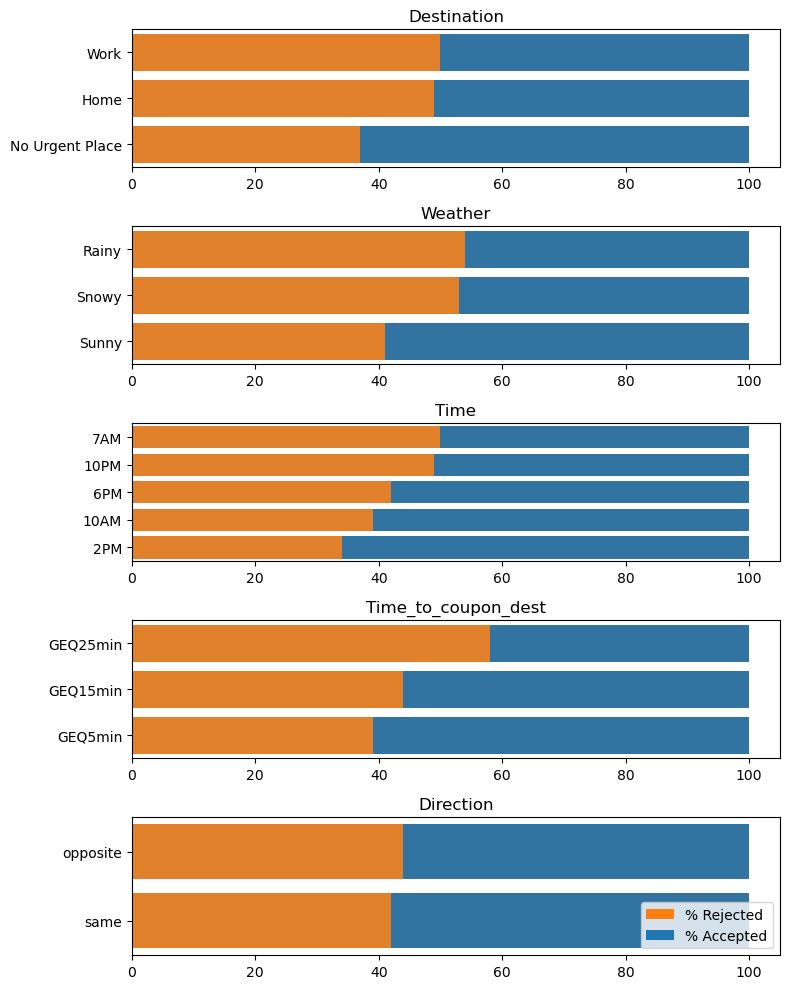

In [25]:
# we will create subplots for each of the columns for comparing rejected vs acceptace %

# create a function which will create a bar plot for the column which is passed to the function
def plot_countplot(df, col,  target_column):
    
    # create the crosstab of different value withing a  column using the column passsed 
    # to the function and target column (Coupon Status)
    crosstab = pd.crosstab(df[col], df[target_column])
    
    #calculate the % for the values in the cross tab
    percentages = (crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(0).astype(int)
    percentages["total"] = percentages["Accepted"] + percentages["Rejected"]
    
    # sort the percentages in decending order of rejection
    percentages = percentages.sort_values(by="Rejected", ascending=False)

   
    # create bar plot for showing rejection vs. acceptance
    sns.barplot(data=percentages, y=percentages.index, x='total', color='#1F77B4', orient='h')
    sns.barplot(data=percentages, y=percentages.index, x='Rejected', color='#FF7F0E', orient='h')
    ax.set_xticklabels([])
    
    # update the lables to be displayed for the cross tab
    plt.title(percentages.index.name[0].upper() + percentages.index.name[1:])
    plt.ylabel("")
    plt.xlabel("")


def main():
    # prepare diferent variables for dynamically creating graphs for categorical columns
    num_cols = data_trip.select_dtypes(exclude='int64').columns
    target_column = "coupon_status"
    rows = num_cols.shape[0]
    fig_cnt = 1
    
    #define the main plot dimension to be used for all the subplots being created
    fig = plt.figure(figsize=(8, 2 * (len(num_cols) - 1)))
    
    #create subplots for each of the categorical columns by looping through each of the columns
    for i, col in enumerate(num_cols):
        plt.subplot(len(num_cols) - 1, 1, i + 1)
        plot_countplot(data_trip, col,  target_column)
        fig_cnt = fig_cnt + 1    
        if fig_cnt == rows:
            break

    #create the legend for the graph    
    legend_elements = [Patch(facecolor='#FF7F0E', label='% Rejected'),
                       Patch(facecolor='#1F77B4', label='% Accepted')]
    plt.legend(handles=legend_elements, loc='lower right', frameon=True, facecolor = 'white')

    #show the plot
    plt.tight_layout()
    plt.show()


#execute the code by calling main()function    
main()

<b> Observations - Trip</b>
 - Drivers will most likely to accept the coupons if they are not driving to any urgent place
 - Good and sunny weather positively infuence the acceptance rate of the coupons
 - Early morning and late nights are not the best times of offer couons
 - Majority of coupons are accepted around noon time
 - As the desition of coupon increases, the lesser will be the acceptance arate of the coupon
 - Direciton of travel though does not significantly impact the acceptance rate

#### EDA - Coupon Information:

Below columns could be grouped together for further analysis around Coupon Information and different variables impacting the acceptance of a coupon
 - coupon (5)
 - expiration (6) 
 

In [26]:
# create a new dataframe to focus on columns relating to coupon information
data_coupon = data[['coupon','expiration','Y']].reset_index()

#create a new column by replacing the boolean values for column "Y" with descrptive values
data_coupon['coupon_status'] = data_coupon.apply( 
    lambda row: 'Accepted' if (row.Y == 1) else 'Rejected' , axis=1) 

#drop the columns which are not needed anymore as new columns were created using them already
data_coupon.drop(columns=['Y','index'],inplace=True)

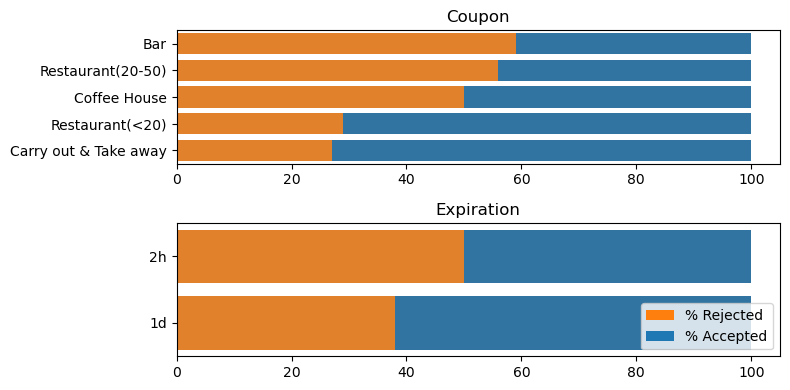

In [27]:
# we will create subplots for each of the columns for comparing rejected vs acceptace %

# create a function which will create a bar plot for the column which is passed to the function
def plot_countplot(df, col,  target_column):
    
    # create the crosstab of different value withing a  column using the column passsed 
    # to the function and target column (Coupon Status)   
    crosstab = pd.crosstab(df[col], df[target_column])
    
    #calculate the % for the values in the cross tab
    percentages = (crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(0).astype(int)
    percentages["total"] = percentages["Accepted"] + percentages["Rejected"]
    
    # sort the percentages in decending order of rejection
    percentages = percentages.sort_values(by="Rejected", ascending=False)

    # create bar plot for showing rejection vs. acceptance
    sns.barplot(data=percentages, y=percentages.index, x='total', color='#1F77B4', orient='h')
    sns.barplot(data=percentages, y=percentages.index, x='Rejected', color='#FF7F0E', orient='h')
    
    # update the lables to be displayed for the cross tab
    ax.set_xticklabels([])
    plt.title(percentages.index.name[0].upper() + percentages.index.name[1:])
    plt.ylabel("")
    plt.xlabel("")

# create a function to loop through all the columns for creating subplots
def main():
    # prepare diferent variables for dynamically creating graphs for categorical columns
    num_cols = data_coupon.select_dtypes(exclude='int64').columns
    target_column = "coupon_status"
    rows = num_cols.shape[0]
    
    #define the main plot dimension to be used for all the subplots being created
    fig_cnt = 1
    
    #create subplots for each of the categorical columns by looping through each of the columns
    fig = plt.figure(figsize=(8, 2 * (len(num_cols) - 1)))
    for i, col in enumerate(num_cols):
        plt.subplot(len(num_cols) - 1, 1, i + 1)
        plot_countplot(data_coupon, col,  target_column)
        fig_cnt = fig_cnt + 1    
        if fig_cnt == rows:
            break
        
    #create the legend for the graph  
    legend_elements = [Patch(facecolor='#FF7F0E', label='% Rejected'),
                       Patch(facecolor='#1F77B4', label='% Accepted')]
    plt.legend(handles=legend_elements, loc='lower right', frameon=True, facecolor = 'white')
    plt.tight_layout()
    plt.show()

    
#execute the code by calling main() function      
main()

<b> Observations - Trip</b>
 - Coupons for Restuarants or "Carry out & Take away" has higer accetance rate
 - Coupons which are expiring a day later have higher acceptance rate compared to coupons expiring in 2 hours


#### EDA - Passenger Information:

Below columns could be grouped together for further analysis around Coupon Information and different variables impacting the acceptance of a coupon
 - passanger (1)
 - gender (7)
 - age (8)
 - maritalStatus (9)
 - has_children (10)
 - education (11)
 - occupation (12)
 - income (13)
 

In [111]:
# create a new dataframe to focus on columns relating to passenger information
data_passenger = data[['passanger','gender','age','maritalStatus','has_children'
                    ,'education','income','Y']].reset_index()
#create a new column by replacing the boolean values for column "Y" with descrptive values
data_passenger['coupon_status'] = data_passenger.apply( 
    lambda row: 'Accepted' if (row.Y == 1) else 'Rejected' , axis=1) 

#drop the columns which are not needed anymore as new columns were created using them already
data_passenger.drop(columns=['Y','index'],inplace=True)

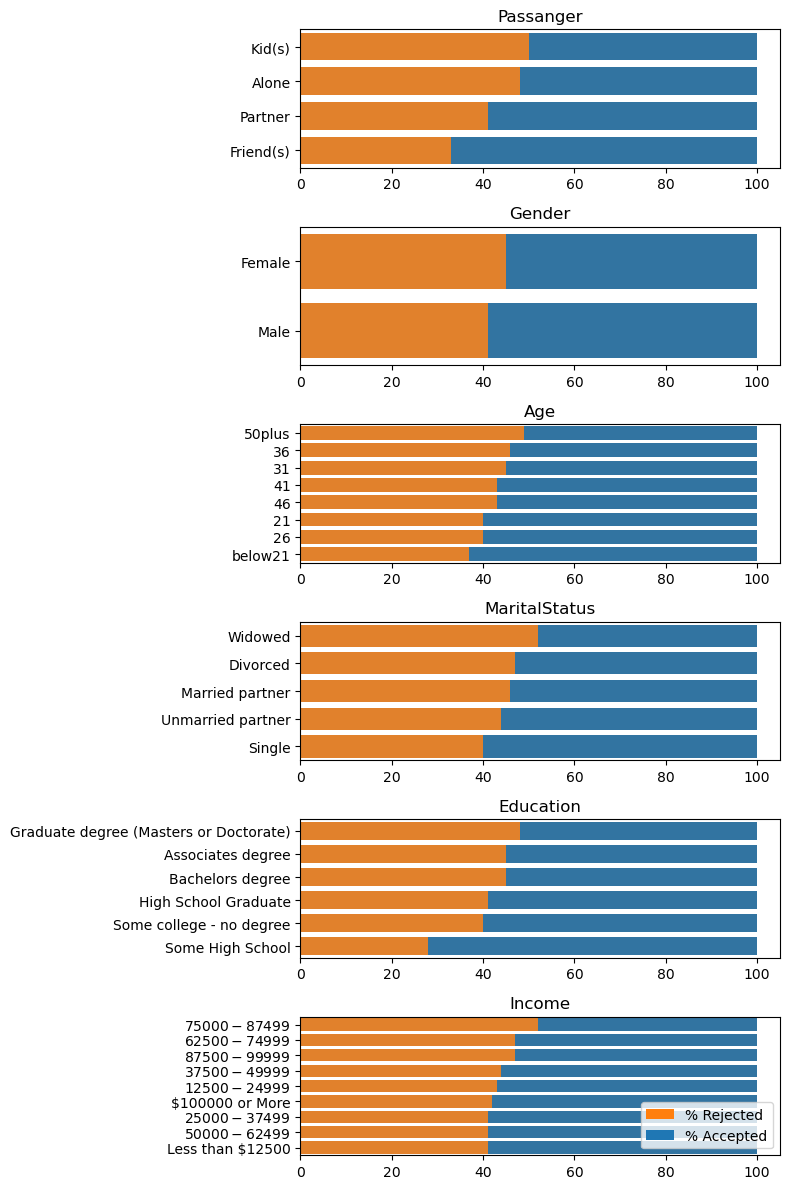

In [112]:
# we will create subplots for each of the columns for comparing rejected vs acceptace %

# create a function which will create a bar plot for the column which is passed to the function
def plot_countplot(df, col,  target_column):
    
    # create the crosstab of different value withing a  column using the column passsed 
    # to the function and target column (Coupon Status) 
    crosstab = pd.crosstab(df[col], df[target_column])
    
    #calculate the % for the values in the cross tab
    percentages = (crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(0).astype(int)
    percentages["total"] = percentages["Accepted"] + percentages["Rejected"]
    
    # sort the percentages in decending order of rejection
    percentages = percentages.sort_values(by="Rejected", ascending=False)

    # create bar plot for showing rejection vs. acceptance
    sns.barplot(data=percentages, y=percentages.index, x='total', color='#1F77B4', orient='h')
    sns.barplot(data=percentages, y=percentages.index, x='Rejected', color='#FF7F0E', orient='h')
    ax.set_xticklabels([])

    # update the lables to be displayed for the cross tab
    plt.title(percentages.index.name[0].upper() + percentages.index.name[1:])
    plt.ylabel("")
    plt.xlabel("")

# create a function to loop through all the columns for creating subplots
def main():
    # prepare diferent variables for dynamically creating graphs for categorical columns
    num_cols = data_passenger.select_dtypes(exclude='int64').columns
    target_column = "coupon_status"
    rows = num_cols.shape[0]
    
    #define the main plot dimension to be used for all the subplots being created
    fig_cnt = 1
    fig = plt.figure(figsize=(8, 2 * (len(num_cols) - 1)))
    
    #create subplots for each of the categorical columns by looping through each of the columns
    for i, col in enumerate(num_cols):
        plt.subplot(len(num_cols) - 1, 1, i + 1)
        plot_countplot(data_passenger, col,  target_column)
        fig_cnt = fig_cnt + 1    
        if fig_cnt == rows:
            break
        
    #create the legend for the graph  
    legend_elements = [Patch(facecolor='#FF7F0E', label='% Rejected'),
                       Patch(facecolor='#1F77B4', label='% Accepted')]
    plt.legend(handles=legend_elements, loc='lower right', frameon=True, facecolor = 'white')
    plt.tight_layout()
    plt.show()


#execute the code by calling main() function      
main()

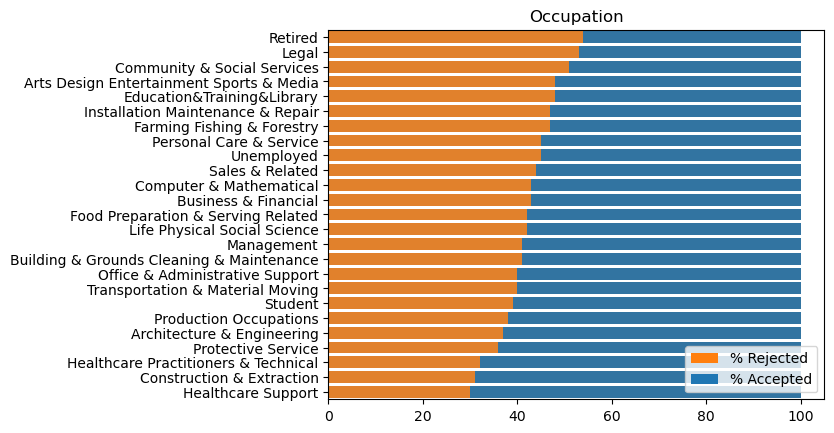

In [113]:
#for the occupation column no of unique values were too many and we will create its plot separately

# create a new dataframe for the occupation data
data_occupation = data[['occupation','Y']].reset_index()

# replace the boolean values with descriptive values and create a new column
data_occupation['coupon_status'] = data_occupation.apply( 
    lambda row: 'Accepted' if (row.Y == 1) else 'Rejected' , axis=1) 

# drop redundant columns
data_occupation.drop(columns=['Y','index'],inplace=True)


# create crosstab for the different values in the column Occupation and coupon status column
crosstab = pd.crosstab(data_occupation['occupation'], data_occupation['coupon_status'])
    

# calculate the different percentages
percentages = (crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(0).astype(int)
percentages["total"] = percentages["Accepted"] + percentages["Rejected"]
percentages = percentages.sort_values(by="Rejected", ascending=False)

#create the bar plot   
sns.barplot(data=percentages, y=percentages.index, x='total', color='#1F77B4', orient='h')
sns.barplot(data=percentages, y=percentages.index, x='Rejected', color='#FF7F0E', orient='h')

# create the legend to be used in the plot
legend_elements = [Patch(facecolor='#FF7F0E', label='% Rejected'),
                       Patch(facecolor='#1F77B4', label='% Accepted')]
plt.legend(handles=legend_elements, loc='lower right', frameon=True, facecolor = 'white')    

# create title for the plot
plt.title(percentages.index.name[0].upper() + percentages.index.name[1:])
plt.ylabel("")
plt.xlabel("")
plt.show()


<b> Observations - Trip</b>
 - Driver with a friend or partner passenger will be more likely to accept the coupons, and the opposite is true for the driver with Kids, who are least likely to accept the coupons
 - Group of drivers aged less than 30 are more likely to accept the coupons
 - Drivers who are single or are with unmarried friends will most likely accept the coupon, and widows are least likely to accept the coupons
 - Having just a High School education which also must he impacting low-income drivers, are more likely to accept the coupons
 - Drivers with Master's or Doctorate degrees are most likely to plan and stick to their plans and will be least likely to accept the coupons. With higher education, they should be earning well not to be interested in using coupons
 - Overall, low income will be a motivating factor for the drivers to accept the coupons
 - Healthcare professionals are the biggest group to accept the coupons
 

#### EDA - Visitation Preference:

Below columns could be grouped together for further analysis Visitation Preferences and different variables impacting the acceptance of a coupon
 - Bar (15)
 - CoffeeHouse (16)
 - CarryAway (17)
 - RestaurantLessThan20 (18)
 - Restaurant20To50 (19)

In [114]:
# create a new dataframe to focus on columns relating to visitation preferences information
data_preference = data[['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','Y']].reset_index()

#create a new column by replacing the boolean values for column "Y" with descrptive values
data_preference['coupon_status'] = data_preference.apply( 
    lambda row: 'Accepted' if (row.Y == 1) else 'Rejected' , axis=1) 

#drop the columns which are not needed anymore as new columns were created using them already
data_preference.drop(columns=['Y','index'],inplace=True)

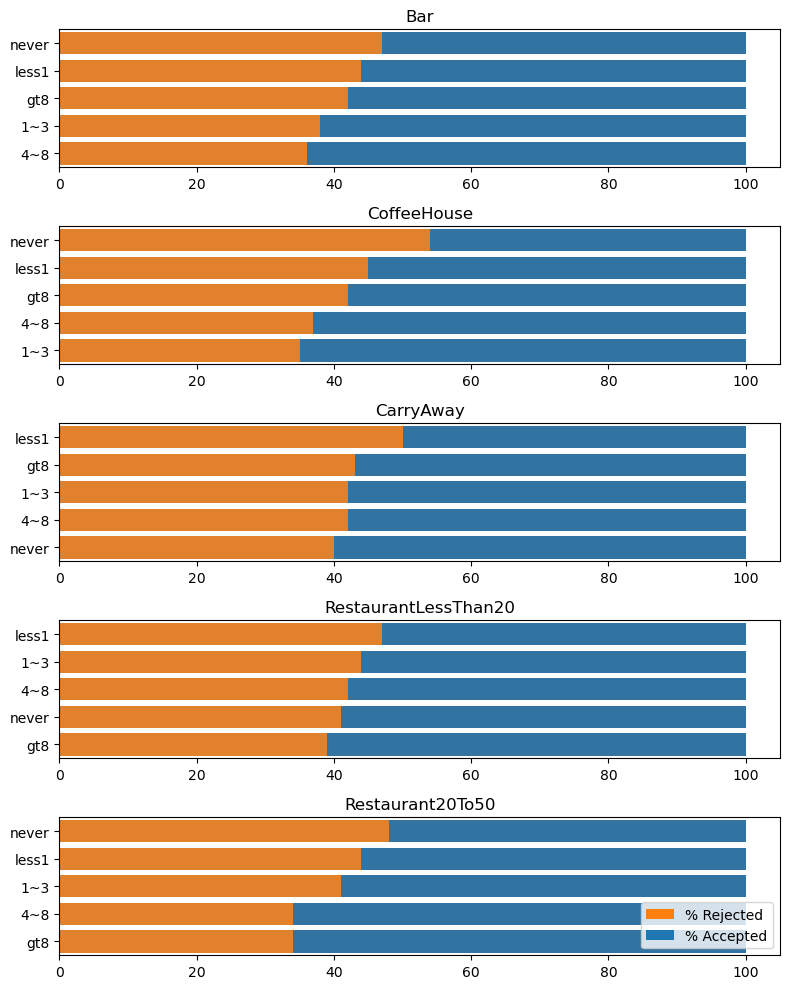

In [115]:
# we will create subplots for each of the columns for comparing rejected vs acceptace %

# create a function which will create a bar plot for the column which is passed to the function
def plot_countplot(df, col,  target_column):
    
    # create the crosstab of different value withing a  column using the column passsed 
    # to the function and target column (Coupon Status)   
    crosstab = pd.crosstab(df[col], df[target_column])
    
    #calculate the % for the values in the cross tab
    percentages = (crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(0).astype(int)
    percentages["total"] = percentages["Accepted"] + percentages["Rejected"]

    # sort the percentages in decending order of rejection
    percentages = percentages.sort_values(by="Rejected", ascending=False)

    # create bar plot for showing rejection vs. acceptance
    sns.barplot(data=percentages, y=percentages.index, x='total', color='#1F77B4', orient='h')
    sns.barplot(data=percentages, y=percentages.index, x='Rejected', color='#FF7F0E', orient='h')
    
    # update the lables to be displayed for the cross tab
    ax.set_xticklabels([])
    plt.title(percentages.index.name[0].upper() + percentages.index.name[1:])
    plt.ylabel("")
    plt.xlabel("")

# create a function to loop through all the columns for creating subplots
def main():
    # prepare diferent variables for dynamically creating graphs for categorical columns
    num_cols = data_preference.select_dtypes(exclude='int64').columns
    target_column = "coupon_status"
    rows = num_cols.shape[0]
    #define the main plot dimension to be used for all the subplots being created
    fig_cnt = 1
    fig = plt.figure(figsize=(8, 2 * (len(num_cols) - 1)))
    
    #create subplots for each of the categorical columns by looping through each of the columns
    for i, col in enumerate(num_cols):
        plt.subplot(len(num_cols) - 1, 1, i + 1)
        plot_countplot(data_preference, col,  target_column)
        fig_cnt = fig_cnt + 1    
        if fig_cnt == rows:
            break
    
    #create the legend for the graph  
    legend_elements = [Patch(facecolor='#FF7F0E', label='% Rejected'),
                       Patch(facecolor='#1F77B4', label='% Accepted')]
    plt.legend(handles=legend_elements, loc='lower right', frameon=True, facecolor = 'white')
    plt.tight_layout()
    plt.show()

#execute the code by calling main() function      
main()

<b> Observations - Preferences</b>
 - Drivers who frequently visit the Bars and CoffeeHouse are more like to accept the coupons.
 - Drivers who never visited Bars and CoffeeHouse will not be accepting the respective coupons, but surprisingly drivers who have never ordered CarryAway before will most likely accept the coupons. This suggests CarryAway coupons could be used to expose certain restaurants to new customers
 - No difference is observed between the drivers who go to cheaper or more expensive restaurants, as the only factor that positively affects the drivers accepting the coupon is the frequency of their visits. Higher the frequency of the visits, the more likely they are going to accept the coupon

 #### Conclusion
 
 Let's first answer the prompt questions at the beginning using the observeations from data.
 
 - Would you accept that coupon and take a short detour to the restaraunt? 
     _The direction of detour though is irrelevant but the time to destination should be lesser for the acceptance based on data._
 - Would you accept the coupon but use it on a sunbsequent trip? 
     _In the data, the preference of coupons with expiry of 1 day was clearly observed.
 - Would you ignore the coupon entirely?_
     _In certian situations the coupon will be ignored entirely e.g. when driving with kids, bar coupons to drivers who never went to bar etc._
 - What if the coupon was for a bar instead of a restaraunt? 
     _Coupon to both bar and restaurant are equally preferred by the drivers with higher histroical frequency of visiting such places._
 - What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? 
     _Acceptance rate of coffehouse is 50% and driver will most likely to reject the bar coupon when driving with a monor_
 - What about if it was just you and your partner in the car? 
     _An inpromptu plan could be accepted when driving with partner and data also suggest that coupon;s acceptance will be higher_
 - Would weather impact the rate of acceptance? 
     _A good weather is conducive to coupon acceptance and bad weather will prompt the drivers to reach their destinations_
 - What about the time of day?
     _Time around noon time is most conducive for drivers to accept the coupons._
     
<b> Actionable observations</b>
- Good and sunny weather positively infuence the acceptance rate of the coupons
- Time around noon time is the best acceptance rates
- Lesser the time it takes driver to reach the destination, more like they are going to accept the coupons
- Restaurant (cheap and expensive) and Carry Out coupones are most likely to be accepted
- Coupons with exiry period of 1 day are more likely to be accepted
- Young drivers(<30) are more likely to accept the coupons
- Drivers with only high school education are more likely to accept the coupons 

<b> Next Steps</b>
- Use the actionable observations to adjust the coupon delivery model and create a more focussed coupon distribution campaign
- Proceed with subsequent encoding of data to generate either Decision Trees or other models to help campaign leaders